In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Logistic mapping

In [3]:
def LogisticMapping(x, mu):
    return 4*mu * x * (1-x)

(0.0, 1.0)

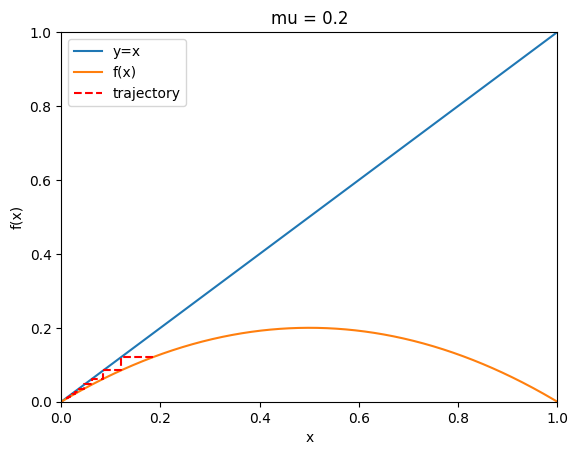

In [92]:
mu = 0.2
x_list = np.linspace(0, 1, 1000)
y = LogisticMapping(x_list, mu)

x_0 = np.random.random()
trajectory = []
steps = 10
for s in range(steps):
    x_i = LogisticMapping(x_0, mu)
    trajectory.append([x_0, x_i])
    trajectory.append([x_i, x_i])
    x_0 = x_i

trajectory = np.array(trajectory).T

plt.plot(x_list, x_list, label="y=x")
plt.plot(x_list, y, label="f(x)")
plt.plot(trajectory[0], trajectory[1], "r--", label="trajectory")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title(f"mu = {mu}")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)

(0.0, 1.0)

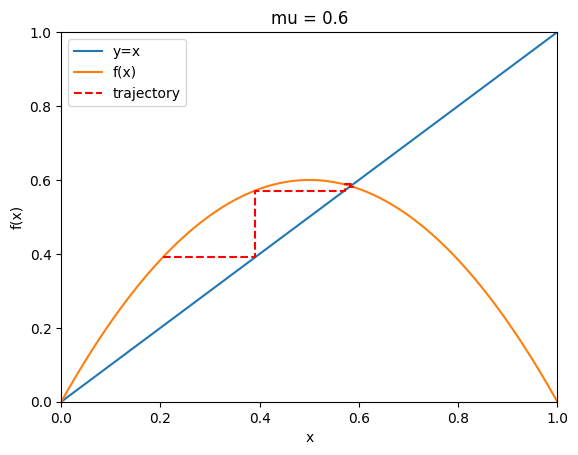

In [98]:
mu = 0.6
x_list = np.linspace(0, 1, 1000)
y = LogisticMapping(x_list, mu)

x_0 = np.random.random()
trajectory = []
steps = 10
for s in range(steps):
    x_i = LogisticMapping(x_0, mu)
    trajectory.append([x_0, x_i])
    trajectory.append([x_i, x_i])
    x_0 = x_i

trajectory = np.array(trajectory).T

plt.plot(x_list, x_list, label="y=x")
plt.plot(x_list, y, label="f(x)")
plt.plot(trajectory[0], trajectory[1], "r--", label="trajectory")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title(f"mu = {mu}")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)

(0.0, 1.0)

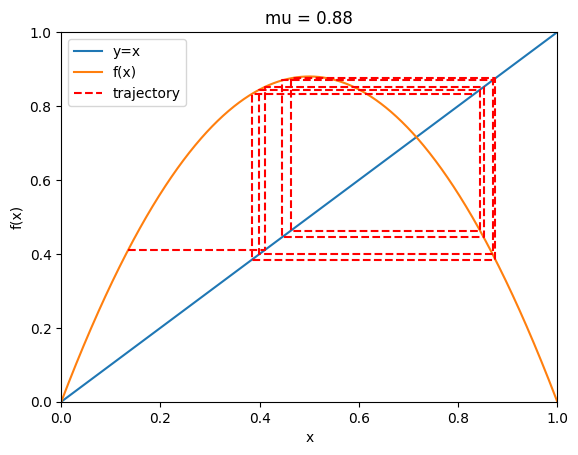

In [96]:
mu = 0.88
x_list = np.linspace(0, 1, 1000)
y = LogisticMapping(x_list, mu)

x_0 = np.random.random()
trajectory = []
steps = 10
for s in range(steps):
    x_i = LogisticMapping(x_0, mu)
    trajectory.append([x_0, x_i])
    trajectory.append([x_i, x_i])
    x_0 = x_i

trajectory = np.array(trajectory).T

plt.plot(x_list, x_list, label="y=x")
plt.plot(x_list, y, label="f(x)")
plt.plot(trajectory[0], trajectory[1], "r--", label="trajectory")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title(f"mu = {mu}")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)

(0.0, 1.0)

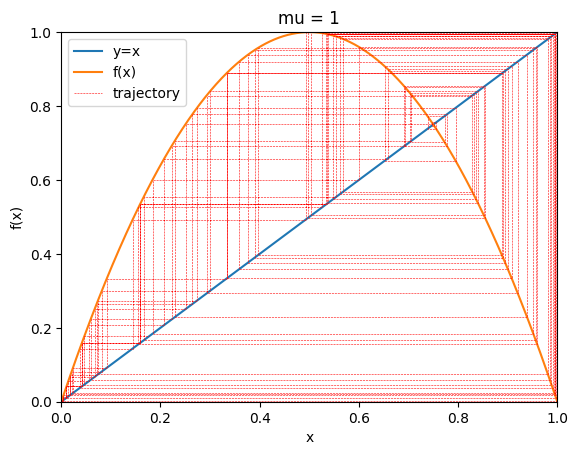

In [100]:
mu = 1
x_list = np.linspace(0, 1, 1000)
y = LogisticMapping(x_list, mu)

x_0 = np.random.random()
trajectory = []
steps = 100
for s in range(steps):
    x_i = LogisticMapping(x_0, mu)
    trajectory.append([x_0, x_i])
    trajectory.append([x_i, x_i])
    x_0 = x_i

trajectory = np.array(trajectory).T

plt.plot(x_list, x_list, label="y=x")
plt.plot(x_list, y, label="f(x)")
plt.plot(trajectory[0], trajectory[1], "r--", label="trajectory", linewidth="0.4")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title(f"mu = {mu}")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)

### Invariant density

In [6]:
# find attractor
# enumerate q million points and plot it on a histogram

In [102]:
def rho(x):
    return 1/(np.pi*np.sqrt(x*(1-x)))

Text(0, 0.5, 'rho(x)')

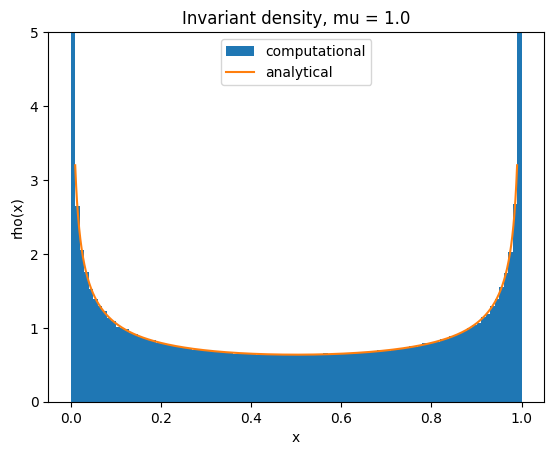

In [104]:
x_0 = np.random.random()
mu = 1

ans = x_0
x_list = []

for iteration in range(10**(6)):
    ans = LogisticMapping(ans, mu)
    x_list.append(ans)

x_range = np.linspace(0.01, 0.99, 10000)
theoretic_rho = rho(x_range)

plt.hist(x_list, density=True, bins=100, label="computational")
plt.plot(x_range, theoretic_rho, label="analytical")
plt.legend()
plt.ylim(0, 5)
plt.title("Invariant density, mu = 1.0")
plt.xlabel("x")
plt.ylabel("rho(x)")


0.09811997048290533


Text(0.5, 1.0, 'Invariant density, mu = 0.9')

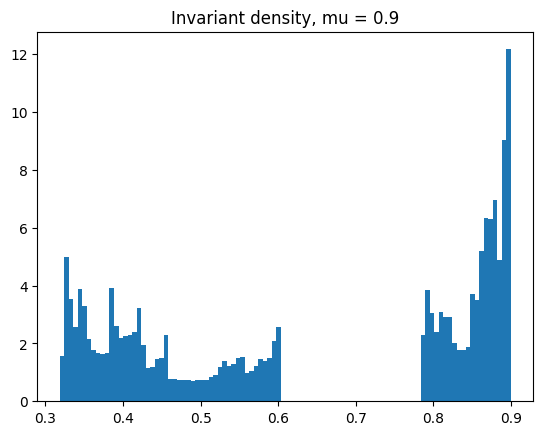

In [110]:
x_0 = np.random.random()
mu = 0.9

ans = x_0
print(ans)
x_list = []

for iteration in range(10**(6)):
    ans = LogisticMapping(ans, mu)
    x_list.append(ans)

plt.hist(x_list, density=True, bins=100)
plt.title("Invariant density, mu = 0.9")

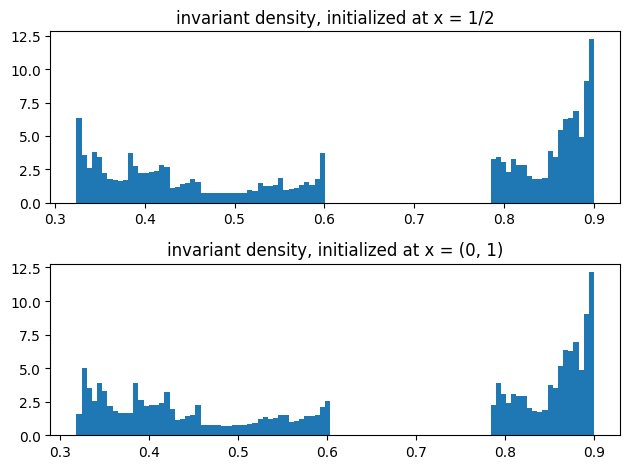

In [111]:
x_0 = 1/2
mu = 0.9

ans = x_0
x_half = []

for iteration in range(10**(6)):
    ans = LogisticMapping(ans, mu)
    x_half.append(ans)

fig, ax = plt.subplots(2, 1)
ax[0].hist(x_half, density=True, bins=100)
ax[0].set_title("invariant density, initialized at x = 1/2")
ax[1].hist(x_list, density=True, bins=100)
ax[1].set_title("invariant density, initialized at x = (0, 1)")
plt.tight_layout()

### Bifurcation

In [112]:
# Find the attractor for given mu

(0.8, 1.0)

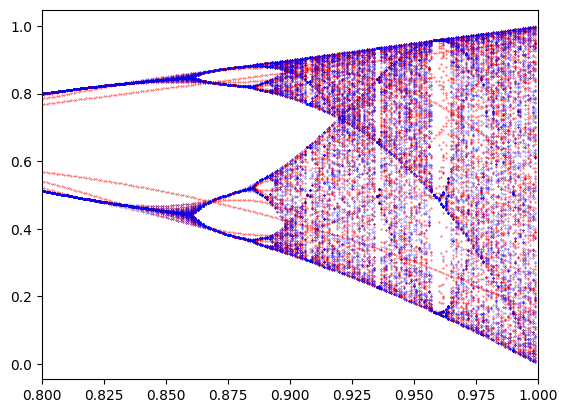

In [132]:
transient = 10000
cycle = 100

def bifurcation(mu, x_0=np.random.random()):
    x = []
    for i in range(transient):
        x_i = LogisticMapping(x_0, mu)
        x.append(x_i)
        x_0 = x_i
    return x[:cycle]

mu_arr = np.arange(0.8, 1, 0.001)

fig, ax = plt.subplots()


for m in mu_arr:
    dots = bifurcation(m)
    ax.scatter([m for i in range(cycle)], dots, s=0.1, color='r')


    x_half = bifurcation(m, 1/2)
    ax.scatter([m for i in range(cycle)], x_half, s=0.05, color='b')

    
ax.set_xlim(0.8, 1)